In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from datetime import datetime
import time
from scipy.stats import linregress

In [2]:
# Import the requests library
import requests

# Import the API key
from config import weather_api_key

In [3]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c97e4af4cd7b576cecefa545a86ba9de


In [4]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities
cities = []

# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city id unique, then we will add it to the cities list
    if city not in cities:
            cities.append(city)
            
# Print the city count to confirm sufficient count
len(cities)

604

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
        
# If an error is experienced, skip the city
    except:
            print("City not found. Skipping...")
            pass
        
# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | hinton
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | thompson
Processing Record 5 of Set 1 | qrendi
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | nanortalik
Processing Record 8 of Set 1 | hithadhoo
Processing Record 9 of Set 1 | massaguet
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | viedma
Processing Record 12 of Set 1 | sioux lookout
Processing Record 13 of Set 1 | mahebourg
Processing Record 14 of Set 1 | fortuna
Processing Record 15 of Set 1 | carutapera
Processing Record 16 of Set 1 | vila franca do campo
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | lethem
Processing Record 19 of Set 1 | pundaguitan
Processing Record 20 of Set 1 | victoria
Processing Record 21 of Set 1 | khuzhir
Processing Record 22 of Set 1 | margate
Processing Record 23 of Se

Processing Record 38 of Set 4 | barrow
Processing Record 39 of Set 4 | mahajanga
Processing Record 40 of Set 4 | norman wells
Processing Record 41 of Set 4 | bosaso
Processing Record 42 of Set 4 | noyabrsk
Processing Record 43 of Set 4 | vanino
Processing Record 44 of Set 4 | isangel
Processing Record 45 of Set 4 | verkh-usugli
Processing Record 46 of Set 4 | kruisfontein
Processing Record 47 of Set 4 | mount isa
Processing Record 48 of Set 4 | kenora
Processing Record 49 of Set 4 | nador
Processing Record 50 of Set 4 | antofagasta
Processing Record 1 of Set 5 | hammerfest
Processing Record 2 of Set 5 | saint-philippe
Processing Record 3 of Set 5 | ribeira grande
Processing Record 4 of Set 5 | trinidad
Processing Record 5 of Set 5 | kemijarvi
Processing Record 6 of Set 5 | amaigbo
Processing Record 7 of Set 5 | naze
Processing Record 8 of Set 5 | marawi
Processing Record 9 of Set 5 | saldanha
Processing Record 10 of Set 5 | geraldton
Processing Record 11 of Set 5 | waipawa
Processing R

Processing Record 30 of Set 8 | ekhabi
Processing Record 31 of Set 8 | kobojango
City not found. Skipping...
Processing Record 32 of Set 8 | yashkul
Processing Record 33 of Set 8 | simpang
Processing Record 34 of Set 8 | iqaluit
Processing Record 35 of Set 8 | coos bay
Processing Record 36 of Set 8 | jibuti
Processing Record 37 of Set 8 | port hardy
Processing Record 38 of Set 8 | pangody
Processing Record 39 of Set 8 | osakarovka
Processing Record 40 of Set 8 | kaiyuan
Processing Record 41 of Set 8 | byron bay
Processing Record 42 of Set 8 | pisco
Processing Record 43 of Set 8 | rawson
Processing Record 44 of Set 8 | biltine
Processing Record 45 of Set 8 | poya
Processing Record 46 of Set 8 | quatre cocos
Processing Record 47 of Set 8 | wattegama
Processing Record 48 of Set 8 | otjimbingwe
Processing Record 49 of Set 8 | broome
Processing Record 50 of Set 8 | saint-augustin
Processing Record 1 of Set 9 | mwinilunga
Processing Record 2 of Set 9 | toguchin
Processing Record 3 of Set 9 |

Processing Record 18 of Set 12 | hobe sound
Processing Record 19 of Set 12 | lolua
City not found. Skipping...
Processing Record 20 of Set 12 | orgun
City not found. Skipping...
Processing Record 21 of Set 12 | myitkyina
Processing Record 22 of Set 12 | ylivieska
Processing Record 23 of Set 12 | moree
Processing Record 24 of Set 12 | shimoda
Processing Record 25 of Set 12 | alenquer
Processing Record 26 of Set 12 | hirara
Processing Record 27 of Set 12 | vzmorye
Processing Record 28 of Set 12 | aden
Processing Record 29 of Set 12 | parrita
Processing Record 30 of Set 12 | mahadday weyne
City not found. Skipping...
Processing Record 31 of Set 12 | sciacca
Processing Record 32 of Set 12 | tabuk
Processing Record 33 of Set 12 | kirakira
Processing Record 34 of Set 12 | siguiri
Processing Record 35 of Set 12 | baia de aries
Processing Record 36 of Set 12 | te anau
Processing Record 37 of Set 12 | chagda
City not found. Skipping...
Processing Record 38 of Set 12 | uribia
Processing Record 3

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Butaritari,3.07,172.79,81.99,70,3,7.72,KI,2020-08-26 02:15:57
1,Hinton,53.40,-117.59,61.99,44,86,1.66,CA,2020-08-26 02:11:32
2,Kapaa,22.08,-159.32,86.00,66,1,12.75,US,2020-08-26 02:15:57
3,Thompson,55.74,-97.86,51.80,87,90,6.93,CA,2020-08-26 02:15:57
4,Qrendi,35.83,14.46,78.01,83,0,3.36,MT,2020-08-26 02:15:58
5,Ushuaia,-54.80,-68.30,39.20,64,75,4.70,AR,2020-08-26 02:12:18
6,Nanortalik,60.14,-45.24,44.29,83,4,6.80,GL,2020-08-26 02:15:58
7,Hithadhoo,-0.60,73.08,82.04,75,100,8.28,MV,2020-08-26 02:15:58
8,Massaguet,12.48,15.44,75.20,94,20,2.24,TD,2020-08-26 02:15:58
9,Port Alfred,-33.59,26.89,61.79,74,76,24.11,ZA,2020-08-26 02:15:58


In [9]:
# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Butaritari,KI,2020-08-26 02:15:57,3.07,172.79,81.99,70,3,7.72
1,Hinton,CA,2020-08-26 02:11:32,53.40,-117.59,61.99,44,86,1.66
2,Kapaa,US,2020-08-26 02:15:57,22.08,-159.32,86.00,66,1,12.75
3,Thompson,CA,2020-08-26 02:15:57,55.74,-97.86,51.80,87,90,6.93
4,Qrendi,MT,2020-08-26 02:15:58,35.83,14.46,78.01,83,0,3.36
5,Ushuaia,AR,2020-08-26 02:12:18,-54.80,-68.30,39.20,64,75,4.70
6,Nanortalik,GL,2020-08-26 02:15:58,60.14,-45.24,44.29,83,4,6.80
7,Hithadhoo,MV,2020-08-26 02:15:58,-0.60,73.08,82.04,75,100,8.28
8,Massaguet,TD,2020-08-26 02:15:58,12.48,15.44,75.20,94,20,2.24
9,Port Alfred,ZA,2020-08-26 02:15:58,-33.59,26.89,61.79,74,76,24.11


In [10]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

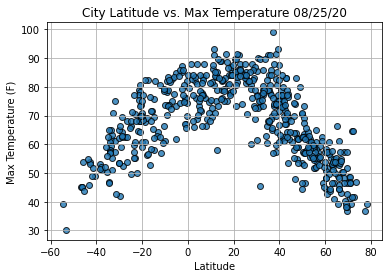

In [12]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

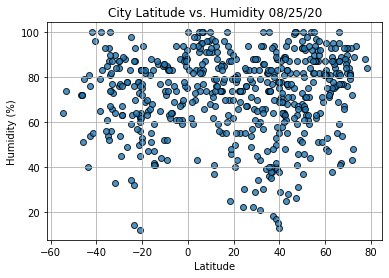

In [13]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

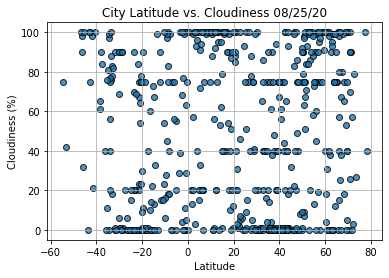

In [14]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

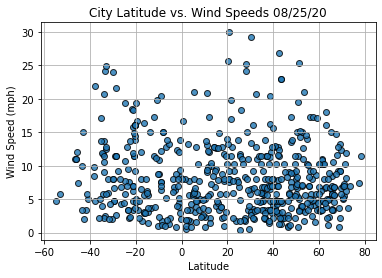

In [15]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speeds "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [21]:
# Create a function to perform linear regression on the weather data and plot
# a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Butaritari,KI,2020-08-26 02:15:57,3.07,172.79,81.99,70,3,7.72
1,Hinton,CA,2020-08-26 02:11:32,53.40,-117.59,61.99,44,86,1.66
2,Kapaa,US,2020-08-26 02:15:57,22.08,-159.32,86.00,66,1,12.75
3,Thompson,CA,2020-08-26 02:15:57,55.74,-97.86,51.80,87,90,6.93
4,Qrendi,MT,2020-08-26 02:15:58,35.83,14.46,78.01,83,0,3.36
5,Ushuaia,AR,2020-08-26 02:12:18,-54.80,-68.30,39.20,64,75,4.70
6,Nanortalik,GL,2020-08-26 02:15:58,60.14,-45.24,44.29,83,4,6.80
7,Hithadhoo,MV,2020-08-26 02:15:58,-0.60,73.08,82.04,75,100,8.28
8,Massaguet,TD,2020-08-26 02:15:58,12.48,15.44,75.20,94,20,2.24
9,Port Alfred,ZA,2020-08-26 02:15:58,-33.59,26.89,61.79,74,76,24.11


In [23]:
# Create Northern and Southern Hemisphere Dataframes
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >=0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

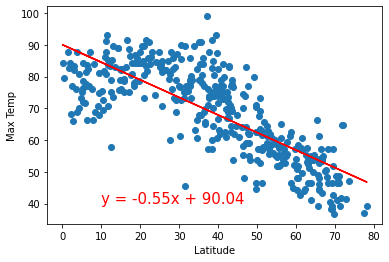

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

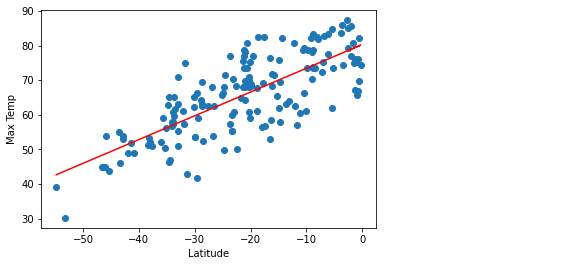

In [26]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

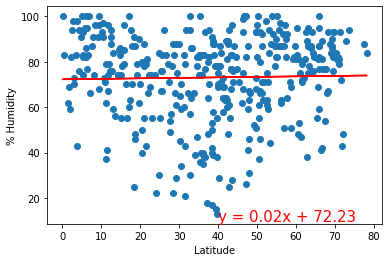

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

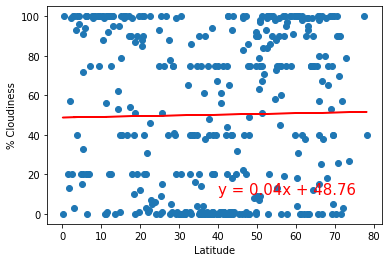

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))

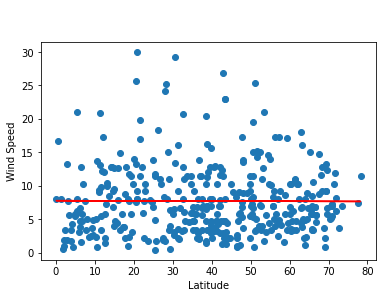

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

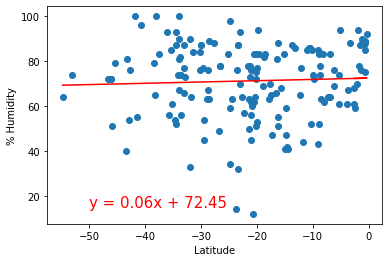

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

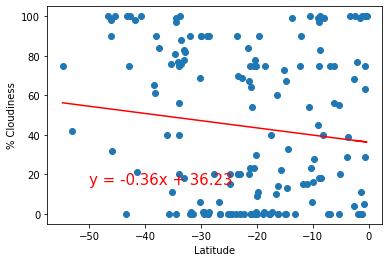

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,15))

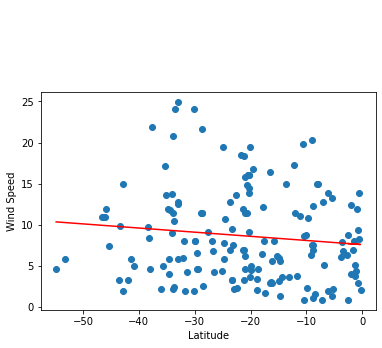

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))